# MISSING VALUE, OUTLIER, DAN TRANSFORMASI DATA
#### NAMA : SALSABILA WARDAH
#### NPM : 23083010092
#### ANALISIS DATA EKSPLORATIF (A)

##### PADA DATASET SAYA SUDAH SAYA LAKUKAN PENGECEKAN MISSING VALUE (NILAI HILANG), DAN HASILNYA TIDAK TERDAPAT MISSING VALUE ATAU NILAI YANG HILANG

In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [72]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


###### SETELAH DIPERIKSA, TERBUKTI BAHWA TIDAK TERDAPAT MISSING VALUE

## MEMBUAT DUMMY VARIABEL

In [74]:
df_dummies = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
for col in df_dummies.columns:
    if df_dummies[col].dtype == 'uint8':
        df_dummies[col] = df_dummies[col].astype(int)
df_dummies.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


## MENCARI OUTLIER

In [75]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = ['year', 'selling_price', 'km_driven']

outliers_dict = {col: detect_outliers_iqr(df, col) for col in numeric_columns}

{col: len(outliers_dict[col]) for col in numeric_columns}

{'year': 105, 'selling_price': 271, 'km_driven': 110}

###### GUNAKAN METODE IQR UNTUK MENCARI OUTLIER YANG ADA DALAM DATA. SETELAH DICARI TERNYATA DATA SAYA MEMILIKI OUTLIER, MAKA SELANJUTNYA AKAN MENGATASI OUTLIER

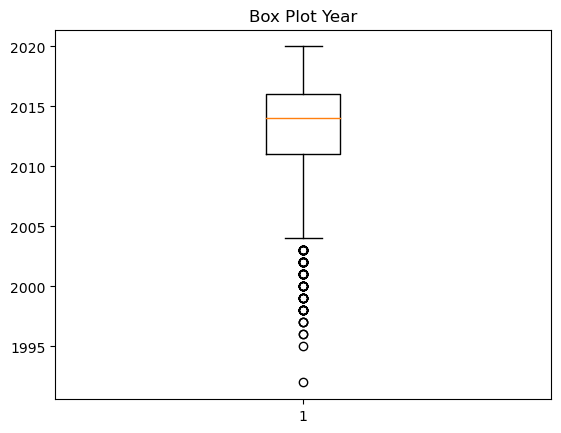

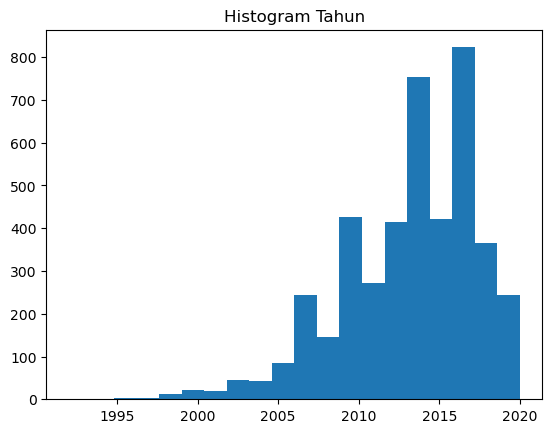

(array([  61,  137,  372,  391,  631,  850, 1126, 1184, 1397, 1404, 1579,
       1598, 1669, 1699, 1927, 1943, 2044, 2097, 2337, 2342, 2495, 2560,
       2635, 2777, 2904, 2908, 2972, 3237, 3334, 3371, 3396, 3532, 3550,
       3621, 3622, 3661, 3849, 3856, 3889, 3984, 4325], dtype=int64),)


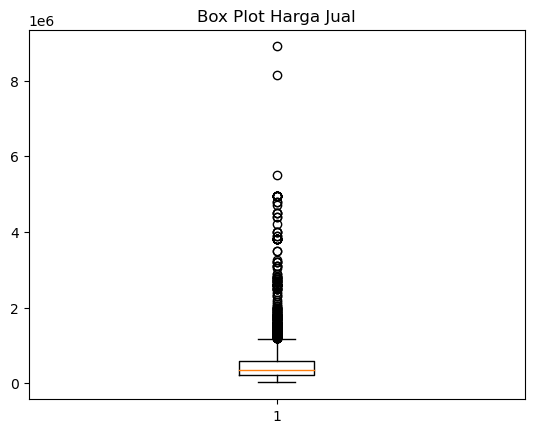

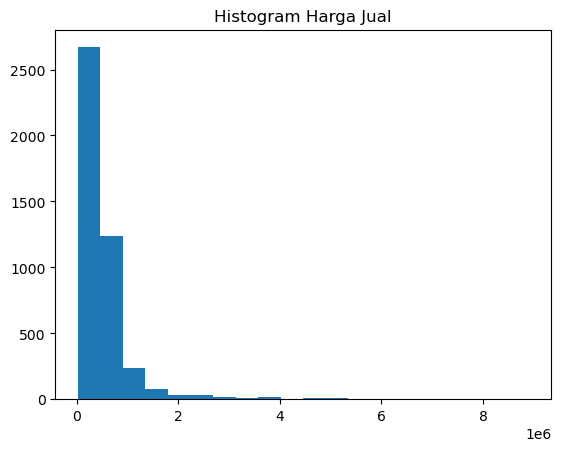

(array([  89,   96,  101,  102,  105,  163,  204,  527,  539,  553,  555,
        563,  572,  574,  582,  591,  593,  601,  610,  612,  620,  731,
        770,  836,  898,  900,  908,  917,  919,  927,  959,  963,  968,
        988, 1021, 1023, 1026, 1031, 1065, 1088, 1107, 1156, 1288, 1290,
       1303, 1410, 1441, 1479, 1623, 1646, 1705, 1834, 1836, 1844, 1915,
       1977, 2178, 2237, 2239, 2247, 2256, 2258, 2266, 2295, 2323, 2503,
       2574, 2580, 2582, 2616, 2737, 2739, 2747, 3064, 3065, 3066, 3261,
       3453, 3596, 3721, 3851, 3863, 3872, 3873, 3875, 3883, 3969, 4047,
       4186, 4224, 4304, 4313], dtype=int64),)


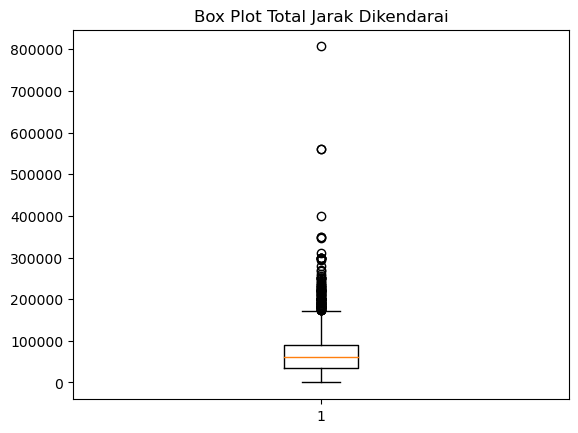

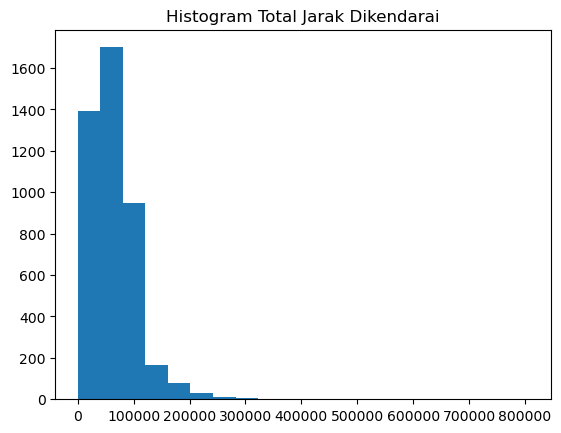

(array([  69,   70,  197,  225,  324,  394,  502,  525,  656, 1101, 1116,
       1243, 1253, 1414, 1426, 1466, 1659, 1668, 1674, 1923, 2278, 2394,
       2401, 2402, 2672, 2760, 2855, 2955, 2961, 2964, 3171, 3447, 3461,
       3470, 3531, 3541, 3572, 3611, 3646, 3675, 3679, 3718, 3734, 3787,
       3898, 3979, 3981, 3994, 4088, 4184, 4208, 4231, 4255, 4275, 4286],
      dtype=int64),)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
32,Audi Q5 2.0 TDI,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
159,Chevrolet Enjoy 1.3 TCDi LS 8,2015,300000,175000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,800000,230000,Diesel,Individual,Manual,First Owner
4255,Mahindra XUV500 W8 2WD,2014,650000,218000,Diesel,Individual,Manual,Second Owner
4275,Mahindra XUV500 W8 2WD,2014,650000,218000,Diesel,Individual,Manual,Second Owner
4286,Fiat Punto 1.3 Emotion,2010,130000,210000,Diesel,Individual,Manual,Second Owner


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/CAR DETAILS FROM CAR DEKHO.csv")

# Visualisasi dengan box plot
plt.boxplot(df['year'])
plt.title('Box Plot Year')
plt.show()

# Visualisasi dengan histogram
plt.hist(df['year'], bins=20)
plt.title('Histogram Tahun')
plt.show()

z_scores = np.abs(stats.zscore(df['year']))
threshold = 3
print(np.where(z_scores > threshold))

# Hitung IQR
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(x=df['selling_price'])
plt.title('Box Plot Harga Jual')
plt.show()

plt.hist(df['selling_price'], bins=20)
plt.title('Histogram Harga Jual')
plt.show()

z_scores = np.abs(stats.zscore(df['selling_price']))
threshold = 3
print(np.where(z_scores > threshold))

# Hitung IQR
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

plt.boxplot(x=df['km_driven'])
plt.title('Box Plot Total Jarak Dikendarai')
plt.show()

plt.hist(df['km_driven'], bins=20)
plt.title('Histogram Total Jarak Dikendarai')
plt.show()

z_scores = np.abs(stats.zscore(df['km_driven']))
threshold = 3
print(np.where(z_scores > threshold))

# Hitung IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]
df[(df['selling_price'] < lower_bound) | (df['selling_price'] > upper_bound)]
df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

## MENGATASI OUTLIER

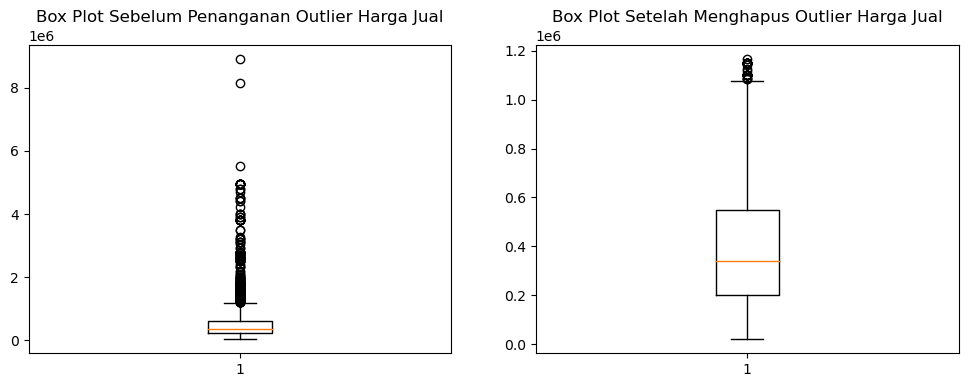

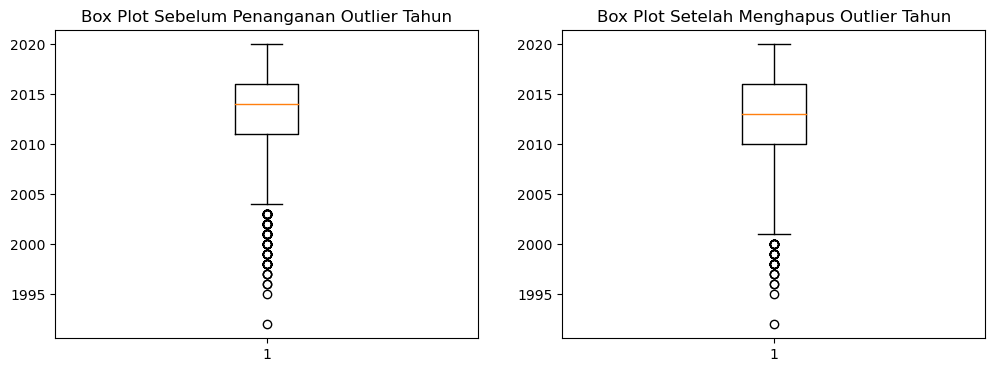

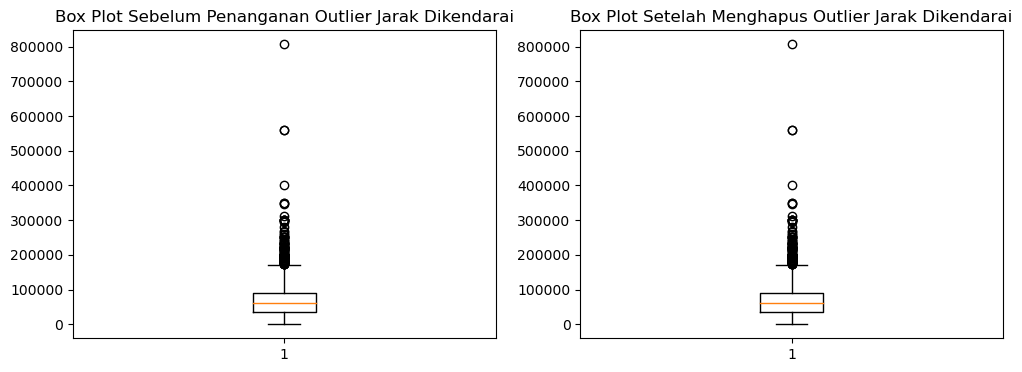

In [77]:
# Hapus outlier dari data asli
df_no_outlier = df.drop(outliers[0])  # Hapus baris dengan indeks outlier

# Visualisasi box plot setelah menghapus outlier harga jual
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['selling_price'])
plt.title('Box Plot Sebelum Penanganan Outlier Harga Jual')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outlier['selling_price'])
plt.title('Box Plot Setelah Menghapus Outlier Harga Jual')
plt.show()

# Visualisasi box plot setelah menghapus outlier tahun
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['year'])
plt.title('Box Plot Sebelum Penanganan Outlier Tahun')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outlier['year'])
plt.title('Box Plot Setelah Menghapus Outlier Tahun')
plt.show()

# Visualisasi box plot setelah menghapus outlier jarak dikendarai
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['km_driven'])
plt.title('Box Plot Sebelum Penanganan Outlier Jarak Dikendarai')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outlier['km_driven'])
plt.title('Box Plot Setelah Menghapus Outlier Jarak Dikendarai')
plt.show()

### MENGATASI OUTLIER DENGAN MENGGANTINYA DENGAN MEDIAN

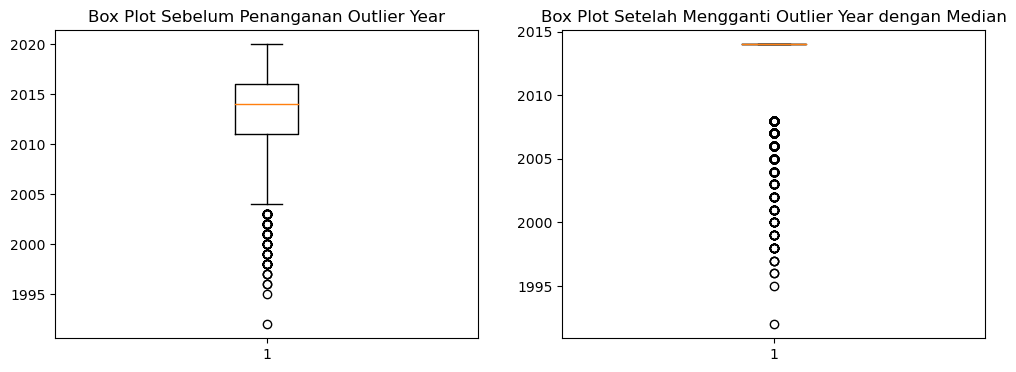

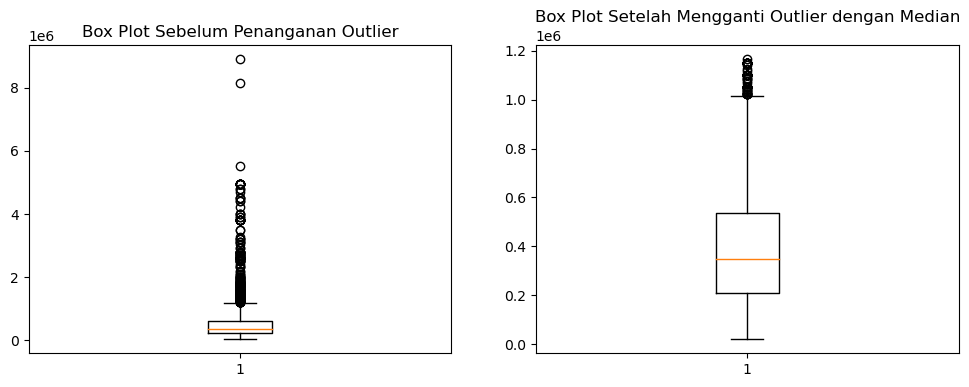

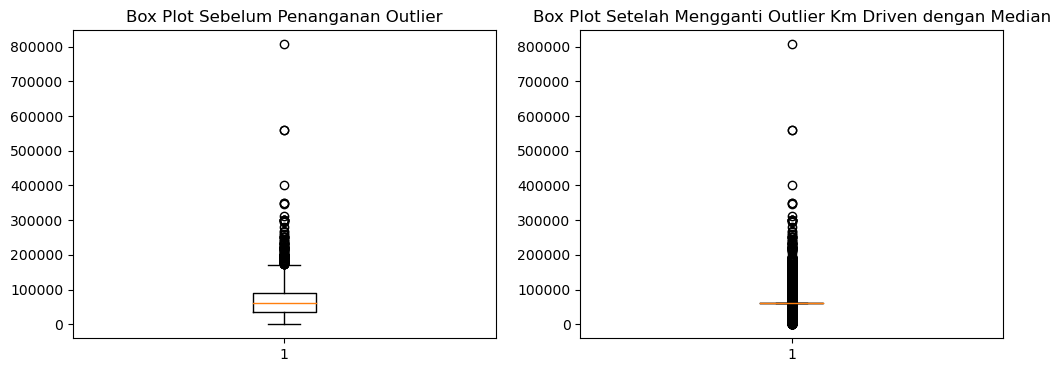

In [78]:
# Tentukan harga median
median_price = df['year'].median()

# Buat masker boolean untuk outlier
outlier_mask = df['year'].isin(df['year'].iloc[outliers])

# Ganti nilai outlier dengan harga median
df_replaced = df.copy()
df_replaced.loc[outlier_mask, 'year'] = median_price

# Visualisasi box plot sebelum dan sesudah penggantian outlier
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['year'])
plt.title('Box Plot Sebelum Penanganan Outlier Year')

plt.subplot(1, 2, 2)
plt.boxplot(df_replaced['year'])
plt.title('Box Plot Setelah Mengganti Outlier Year dengan Median')
plt.show()

# tentukan median
median_price = df['selling_price'].median()

# Buat masker boolean untuk outlier
outlier_mask = df['selling_price'].isin(df['selling_price'].iloc[outliers])

# Ganti nilai outlier dengan harga median
df_replaced = df.copy()
df_replaced.loc[outlier_mask, 'selling_price'] = median_price

# Visualisasi box plot sebelum dan sesudah penggantian outlier
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['selling_price'])
plt.title('Box Plot Sebelum Penanganan Outlier')

plt.subplot(1, 2, 2)
plt.boxplot(df_replaced['selling_price'])
plt.title('Box Plot Setelah Mengganti Outlier dengan Median')
plt.show()

# tentukan median
median_price = df['km_driven'].median()

# Buat masker boolean untuk outlier
outlier_mask = df['km_driven'].isin(df['km_driven'].iloc[outliers])

# Ganti nilai outlier dengan harga median
df_replaced = df.copy()
df_replaced.loc[outlier_mask, 'km_driven'] = median_price

# Visualisasi box plot sebelum dan sesudah penggantian outlier
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['km_driven'])
plt.title('Box Plot Sebelum Penanganan Outlier')

plt.subplot(1, 2, 2)
plt.boxplot(df_replaced['km_driven'])
plt.title('Box Plot Setelah Mengganti Outlier Km Driven dengan Median')
plt.show()

## TRANSFORMASI DATA

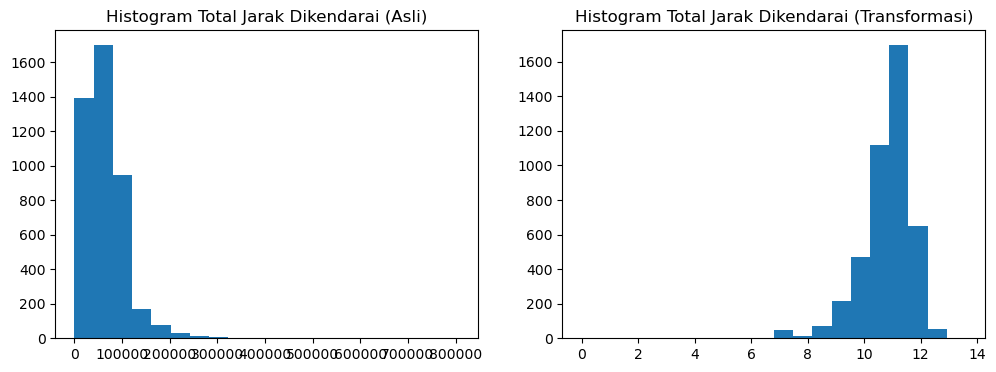

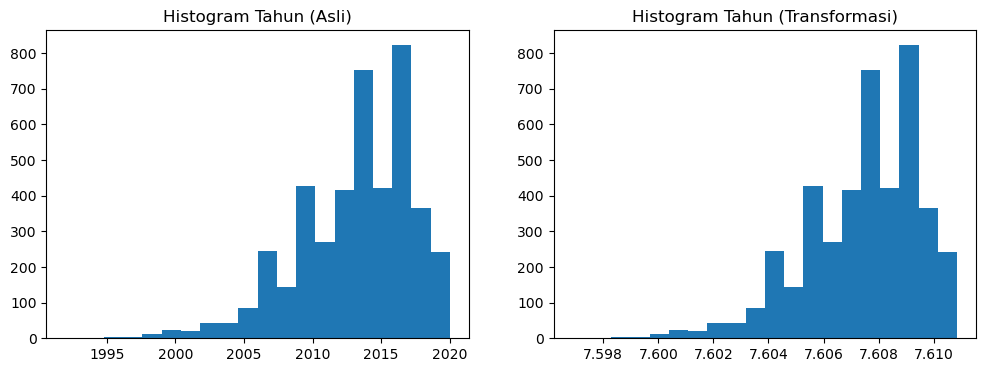

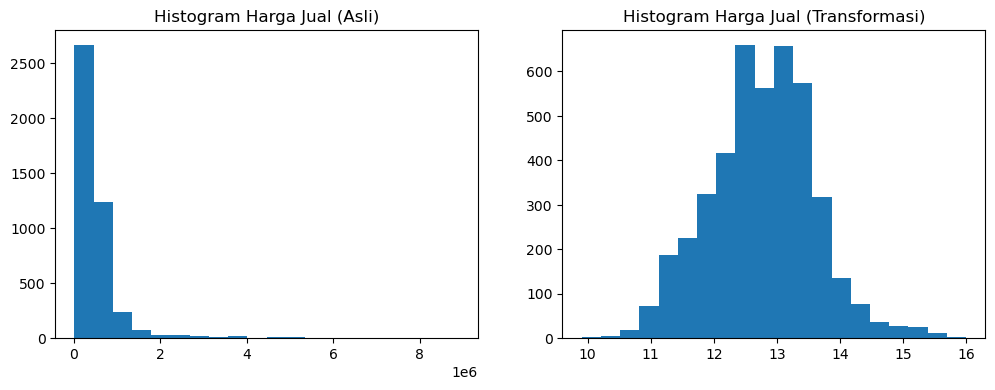

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,-1.445074,-0.767746,0.081139,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,-1.445074,-0.638096,-0.347689,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,-0.258795,0.165731,0.724381,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,0.927485,-0.439300,-0.433455,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,0.215717,-0.093568,1.603479,Diesel,Individual,Manual,Second Owner


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/CAR DETAILS FROM CAR DEKHO.csv")
numeric_cols = ['year', 'selling_price', 'km_driven']

scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

# Buat kolom baru dengan km driven yang ditransformasi log
df_transformed = df.copy()
df_transformed['km_driven_log'] = np.log(df['km_driven'])
# Visualisasi distribusi km driven dan tertransformasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['km_driven'], bins=20)
plt.title('Histogram Total Jarak Dikendarai (Asli)')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['km_driven_log'], bins=20)
plt.title('Histogram Total Jarak Dikendarai (Transformasi)')
plt.show()

# Buat kolom baru dengan tahun yang ditransformasi log
df_transformed = df.copy()
df_transformed['year_log'] = np.log(df['year'])

# Visualisasi distribusi tahun dan tertransformasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['year'], bins=20)
plt.title('Histogram Tahun (Asli)')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['year_log'], bins=20)
plt.title('Histogram Tahun (Transformasi)')
plt.show()

# Buat kolom baru dengan harga jual yang ditransformasi log
df_transformed = df.copy()
df_transformed['selling_price_log'] = np.log(df['selling_price'])

# Visualisasi distribusi harga jual dan tertransformasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['selling_price'], bins=20)
plt.title('Histogram Harga Jual (Asli)')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['selling_price_log'], bins=20)
plt.title('Histogram Harga Jual (Transformasi)')
plt.show()

data_scaled.head()